# Salary Data: Supervised Learning analysis performing EDA and model analysis

This project is about analysising the data, preprocessing (cleaning, integration, transformation and reduction) it in order to find a good regression model based on $R^2$ to predict the salary based on years of experience, level of education and gender, using supervised learning models (Linear Regression, Polynomial Regression, Multi Linear Regression and SVM/SVR)

## Data Collection

Based on the Final project instructions I've decided to get a data from Kaggle. I went to datasets and looked for something that I was interested in analysis and create models. So, I chose one of the salary bases they have there. https://www.kaggle.com/datasets/mohithsairamreddy/salary-data

As per the Author, the dataset was obtained from multiple sources, including surveys, job posting sites, and other publicly available sources. A total of 6704 data points were collected. The dataset included six variables: age, gender, education level, job title, years of experience and salary

### Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy as sp
import scipy.stats as stats
import seaborn as sns
import copy
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

## Data Reading

Data is tabulated in csv and has 6 attibutes (columns) (Age , Gender, Education Level, Job Title, Years of Experience and Salary) with 3 being float (Age, Years of Experience and Salary) and 3 being object (Gender, Education Level and Job Title), 6704 entries (rows), using 314.4KB of memory which is considered medium size in rows and small in columns. It has some null values which will need to be addressed

In [2]:
dataframe=pd.read_csv('Salary_Data.csv')

In [3]:
dataframe.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


## Data Pre-processing

### Cleaning Data

After checking head and info of the data, the topics below got my attention to start cleaning the data\
**Age:** any below 18 years old\
**Genger:** check unique values\
**Education level:** check unique values\
**Job Title:** check unique values\
**Years of experience:** check "0"\
**Salary:** check below 10000/year\
**Null values:** check null values to decide what to do

#### Null Values Identification, Removal and Filling

I've filtered the data using **.isna()** by each attibute to be able to identify the null values and decide what to do with them

In [5]:
dataframe[dataframe['Age'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dataframe[dataframe['Gender'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
dataframe[dataframe['Education Level'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
2011,27.0,Male,NaN,Developer,7.0,100000.0


In [8]:
dataframe[dataframe['Job Title'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
dataframe[dataframe['Years of Experience'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN


In [10]:
dataframe[dataframe['Salary'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


After filtering, I've decided to do  the below

Remove 172 and 260 because all attibutes have null values for those 2 rows using **.drop()**. And created another dataframe called **nonnulldf** to indicate we will have no null values anymore

In [11]:
nonnulldf = dataframe.drop([172,260])

In [12]:
nonnulldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6702 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.5+ KB


For the other 6 null values, as the amount is less than 5% of the attibute data, I have decided to fill them up using **.fillna()** \
Education level fill 2011\
Years of experience fill 5247\
Salary fill 3136,5247 and 6455\
\
For that, I will plot the Histograms to decide which statistic is better to fill each attribute with

In [13]:
columns_dataframe = nonnulldf.columns.values.tolist()
columns_dataframe

['Age',
 'Gender',
 'Education Level',
 'Job Title',
 'Years of Experience',
 'Salary']

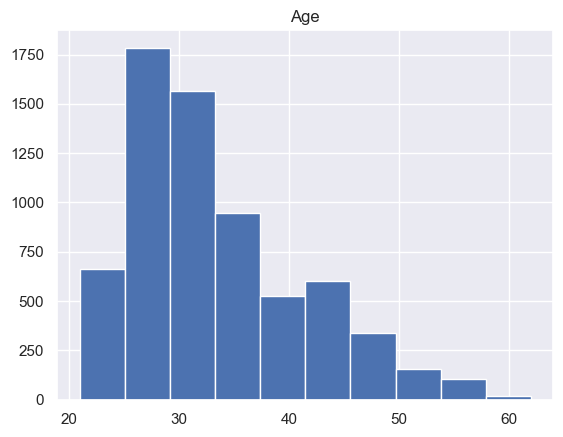

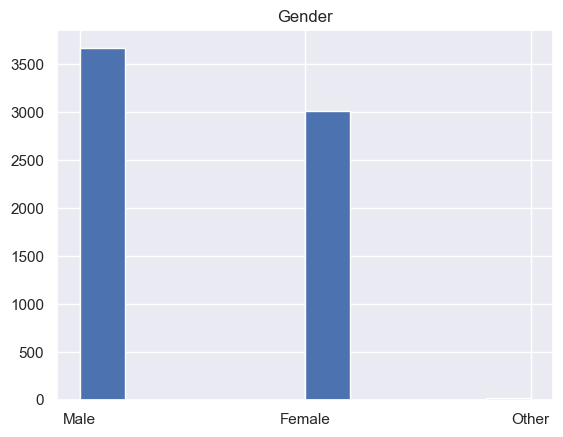

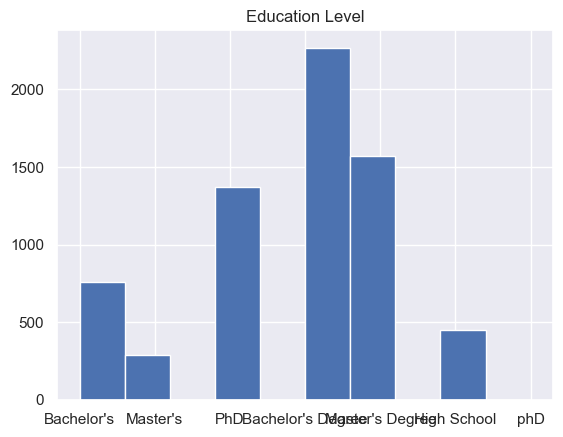

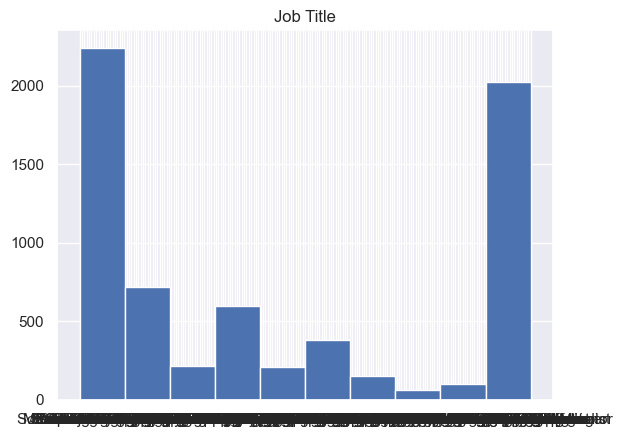

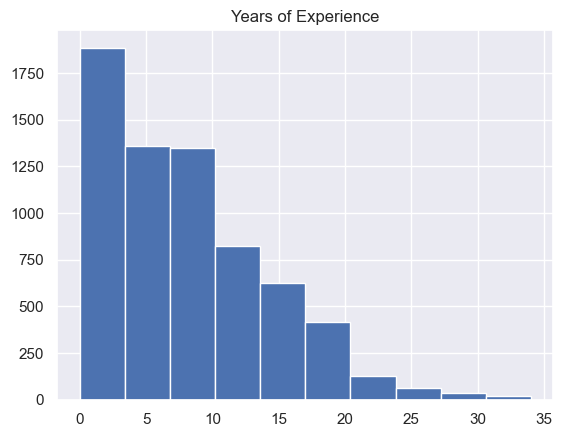

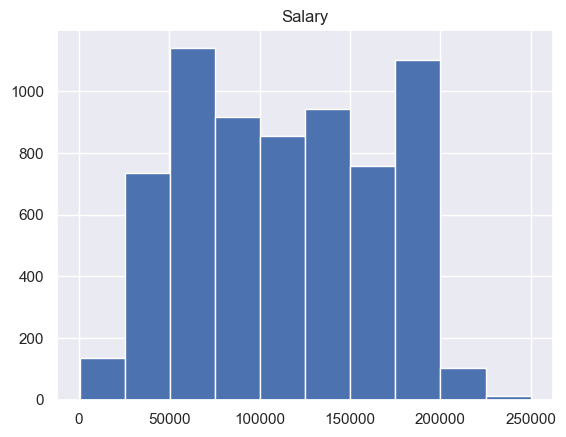

In [14]:
for c in columns_dataframe:
    nonnulldf[c].hist()
    plt.title(c)
    plt.show()

For **Years of Experience**, I used **median** because the districution is positive skewed

In [15]:
nonnulldf['Years of Experience'].fillna(nonnulldf['Years of Experience'].median(),inplace=True)

For **Salary**, I used **mean** because the distribution is symmetric

In [16]:
nonnulldf['Salary'].fillna(nonnulldf['Salary'].mean(),inplace=True)

And for **Education Level**, I used **mode** because the attribute is categorical

In [17]:
nonnulldf['Education Level'].fillna(nonnulldf['Education Level'].mode()[0],inplace=True)

Checking the info of the data we can see that there are not null values

In [18]:
nonnulldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6702 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6702 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6702 non-null   float64
 5   Salary               6702 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.5+ KB


#### Data's uniques values and description

I've used **.describe()** to check the float data situation

In [19]:
nonnulldf.describe()

,Age,Years of Experience,Salary
count,6702.000000,6702.000000,6702.000000
mean,33.620859,8.094524,115326.964771
std,7.614633,6.058566,52774.366549
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


So, for Age the minimum in the data is 21 years old, so I don't have to worry about youth working

For Salary, the minimum is 350, which is impossible because the Salary is annual salary, So my guess about checking the Salary below 10k needs to be done and analysed

For Years of Experience, I believe have 0 years of experience is ok. So, I will leave the way it is

Gender unique values are: Female, Male and Other, I may leave like because there are only 3 unique values

In [20]:
nonnulldf['Gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

For Education Level, there are duplicates, so Bachelor's is the same as Bachelor's Degree. I will have to clean this

In [21]:
nonnulldf['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

There are so many types of Job Titles (193) and this could become an issue after because of the salary analysis, job title has a impact in how big is the salary

In [22]:
nonnulldf['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [23]:
nonnulldf['Job Title'].unique().size

193

### Data Integration and Transformation

Education Level: using **.replace()** to replace the redudant meaning degrees

In [24]:
nonnulldf=nonnulldf.replace("Bachelor's Degree","Bachelor's")

In [25]:
nonnulldf=nonnulldf.replace("Master's Degree","Master's")

In [26]:
nonnulldf=nonnulldf.replace('phD','PhD')

In [27]:
nonnulldf['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

Checking Years of Experience = 0

In [28]:
nonnulldf['Years of Experience'].value_counts()[0]

120

Checking Salary < 10000 to understand the typos of the data, as I saw about the minimum value for salary is 350

There are 4 values below 10000 and all of them are only a hundred value, which means they are typos. My strategy here was to check for similarity to replace those values

In [29]:
nonnulldf[nonnulldf['Salary'] < 10000]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
259,29.0,Male,Bachelor's,Junior Business Operations Analyst,1.5,350.0
1890,25.0,Female,Bachelor's,Front end Developer,1.0,550.0
2654,23.0,Male,PhD,Software Engineer Manager,1.0,579.0
4633,31.0,Female,Bachelor's,Junior HR Coordinator,4.0,500.0


For line 259, it's clear that the Salary is 35000 and it will replace 350

In [30]:
nonnulldf[(nonnulldf['Age'] < 30) & (nonnulldf['Education Level'] == "Bachelor's") & (nonnulldf['Job Title'] == "Junior Business Operations Analyst")]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
218,29.0,Male,Bachelor's,Junior Business Operations Analyst,1.5,35000.0
259,29.0,Male,Bachelor's,Junior Business Operations Analyst,1.5,350.0


For line 1890, it's clear that the Salary is 55000 and it will replace 550

In [31]:
nonnulldf[(nonnulldf['Age'] < 30) & (nonnulldf['Education Level'] == "Bachelor's") & (nonnulldf['Job Title'] == "Front end Developer") & (nonnulldf['Years of Experience'] == 1) & (nonnulldf['Gender'] == "Female")]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1325,23.0,Female,Bachelor's,Front end Developer,1.0,55000.0
1387,24.0,Female,Bachelor's,Front end Developer,1.0,55000.0
1422,23.0,Female,Bachelor's,Front end Developer,1.0,55000.0
1470,24.0,Female,Bachelor's,Front end Developer,1.0,55000.0
1565,24.0,Female,Bachelor's,Front end Developer,1.0,55000.0
1665,25.0,Female,Bachelor's,Front end Developer,1.0,55000.0
1684,25.0,Female,Bachelor's,Front end Developer,1.0,55000.0
1703,25.0,Female,Bachelor's,Front end Developer,1.0,55000.0
1722,25.0,Female,Bachelor's,Front end Developer,1.0,55000.0
1741,25.0,Female,Bachelor's,Front end Developer,1.0,55000.0


For line 2654, different of the other ones, there is no similarity of 579 and 119836, but I will use 119836 to replace 579 because the other 2 rows have the same information for the other attributes

In [32]:
nonnulldf[(nonnulldf['Age'] == 23) & (nonnulldf['Education Level'] == "PhD") & (nonnulldf['Job Title'] == "Software Engineer Manager") & (nonnulldf['Years of Experience'] == 1) & (nonnulldf['Gender'] == "Male")]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
2414,23.0,Male,PhD,Software Engineer Manager,1.0,119836.0
2494,23.0,Male,PhD,Software Engineer Manager,1.0,119836.0
2654,23.0,Male,PhD,Software Engineer Manager,1.0,579.0


For line 4633, it's clear that the Salary is 50000 and it will replace 500

In [33]:
nonnulldf[(nonnulldf['Age'] > 30) & (nonnulldf['Education Level'] == "Bachelor's") & (nonnulldf['Job Title'] == "Junior HR Coordinator") & (nonnulldf['Years of Experience'] == 4) & (nonnulldf['Gender'] == "Female")]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
168,31.0,Female,Bachelor's,Junior HR Coordinator,4.0,50000.0
4529,31.0,Female,Bachelor's,Junior HR Coordinator,4.0,50000.0
4581,31.0,Female,Bachelor's,Junior HR Coordinator,4.0,50000.0
4633,31.0,Female,Bachelor's,Junior HR Coordinator,4.0,500.0


I used **.replace()**, to replace the respectives values

In [34]:
nonnulldf.replace(350.0, 35000.00, inplace=True)

In [35]:
nonnulldf.replace(550.0, 55000.0, inplace=True)
nonnulldf.replace(579.0, 119836.0, inplace=True)
nonnulldf.replace(500.0, 50000.0, inplace=True)

In [36]:
nonnulldf[nonnulldf['Salary'] < 10000]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [37]:
nonnulldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6702 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6702 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6702 non-null   float64
 5   Salary               6702 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.5+ KB


In [38]:
nonnulldf.describe()

,Age,Years of Experience,Salary
count,6702.000000,6702.000000,6702.000000
mean,33.620859,8.094524,115365.439405
std,7.614633,6.058566,52720.080226
min,21.000000,0.000000,25000.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


Now Job Title, I used **.groupby().count()** for job title to see the distribution of the job position in the data because I was worried about having 193 types of job titles

In [39]:
pd.set_option('display.max_rows',None)
nonnulldf.groupby(['Job Title']).count()

,Age,Gender,Education Level,Years of Experience,Salary
Job Title,,,,,
Account Manager,1,1,1,1,1
Accountant,1,1,1,1,1
Administrative Assistant,2,2,2,2,2
Back end Developer,244,244,244,244,244
Business Analyst,2,2,2,2,2
Business Development Manager,1,1,1,1,1
Business Intelligence Analyst,1,1,1,1,1
CEO,1,1,1,1,1
Chief Data Officer,1,1,1,1,1


As we can see, the majority job titles of the data is basicaly technology job title which creates a the bias of the analysis. because of the so meny different job titles and some are more specific and others are not and some have the same meaning and it would be really difficult to clean and make categories to be able after use that in the model, I've decided to remove Job Title as an attribute of the dataframe to execute the models

For Education Level, I've decided to change the attribute from object to ordinal using a dictionary with the values as below and as the High School < Bachelors < Marters < PHD, the ordenal from 1 to 4 would not give a wrong weight in the attribute

In [40]:
nonnulldf['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

In [41]:
ord_enc = {"Education Level": {"Bachelor's":2, "Master's":3, 'PhD':4, 'High School':1}}
nonnulldf=nonnulldf.replace(ord_enc)
nonnulldf.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,2,Software Engineer,5.0,90000.0
1,28.0,Female,3,Data Analyst,3.0,65000.0
2,45.0,Male,4,Senior Manager,15.0,150000.0
3,36.0,Female,2,Sales Associate,7.0,60000.0
4,52.0,Male,3,Director,20.0,200000.0


### Data Reduction

For Gender, I used **.get_dummies** to split and create the new columns for the new and clean dataframe **df**, I used the dummies method because ordinal approch would give a weight in the attribute that I found mistaken, as different of degrees, gender has no better or bigger.

In [42]:
df = pd.get_dummies(nonnulldf, columns=["Gender"])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6702 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Education Level      6702 non-null   int64  
 2   Job Title            6702 non-null   object 
 3   Years of Experience  6702 non-null   float64
 4   Salary               6702 non-null   float64
 5   Gender_Female        6702 non-null   uint8  
 6   Gender_Male          6702 non-null   uint8  
 7   Gender_Other         6702 non-null   uint8  
dtypes: float64(3), int64(1), object(1), uint8(3)
memory usage: 333.8+ KB


In [44]:
df.head()

,Age,Education Level,Job Title,Years of Experience,Salary,Gender_Female,Gender_Male,Gender_Other
0,32.0,2,Software Engineer,5.0,90000.0,0,1,0
1,28.0,3,Data Analyst,3.0,65000.0,1,0,0
2,45.0,4,Senior Manager,15.0,150000.0,0,1,0
3,36.0,2,Sales Associate,7.0,60000.0,1,0,0
4,52.0,3,Director,20.0,200000.0,0,1,0


I used **.rename()** to rename some of the columns because space between words is not very good when you put in algorithms

In [45]:
df.rename(columns={'Education Level':'Education_Level','Years of Experience':'Years_of_Experience'}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6702 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Education_Level      6702 non-null   int64  
 2   Job Title            6702 non-null   object 
 3   Years_of_Experience  6702 non-null   float64
 4   Salary               6702 non-null   float64
 5   Gender_Female        6702 non-null   uint8  
 6   Gender_Male          6702 non-null   uint8  
 7   Gender_Other         6702 non-null   uint8  
dtypes: float64(3), int64(1), object(1), uint8(3)
memory usage: 333.8+ KB


I've dropped Job Title and Gender columns and put Salary as first column of the dataframe.

In [46]:
df=df.drop(columns=['Job Title'])
first_column = df.pop('Salary')
df.insert(0, 'Salary', first_column)
df.head()

,Salary,Age,Education_Level,Years_of_Experience,Gender_Female,Gender_Male,Gender_Other
0,90000.0,32.0,2,5.0,0,1,0
1,65000.0,28.0,3,3.0,1,0,0
2,150000.0,45.0,4,15.0,0,1,0
3,60000.0,36.0,2,7.0,1,0,0
4,200000.0,52.0,3,20.0,0,1,0


In [47]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6702 entries, 0 to 6703
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Salary               6702 non-null   float64
 1   Age                  6702 non-null   float64
 2   Education_Level      6702 non-null   int64  
 3   Years_of_Experience  6702 non-null   float64
 4   Gender_Female        6702 non-null   uint8  
 5   Gender_Male          6702 non-null   uint8  
 6   Gender_Other         6702 non-null   uint8  
dtypes: float64(3), int64(1), uint8(3)
memory usage: 281.4 KB


## Exploratory Data Analysis

### Correlation Analysis

In [48]:
corr = df.corr()

I used the heatmap to see what has more correlation with the salary. So, we can see that Years of Experience is the one more correlated to Salary which means more Years of Experience, bigger Salary. But we have a indication of collinearity between Years of Education and Age, which needs to be fixed.

<Axes: >

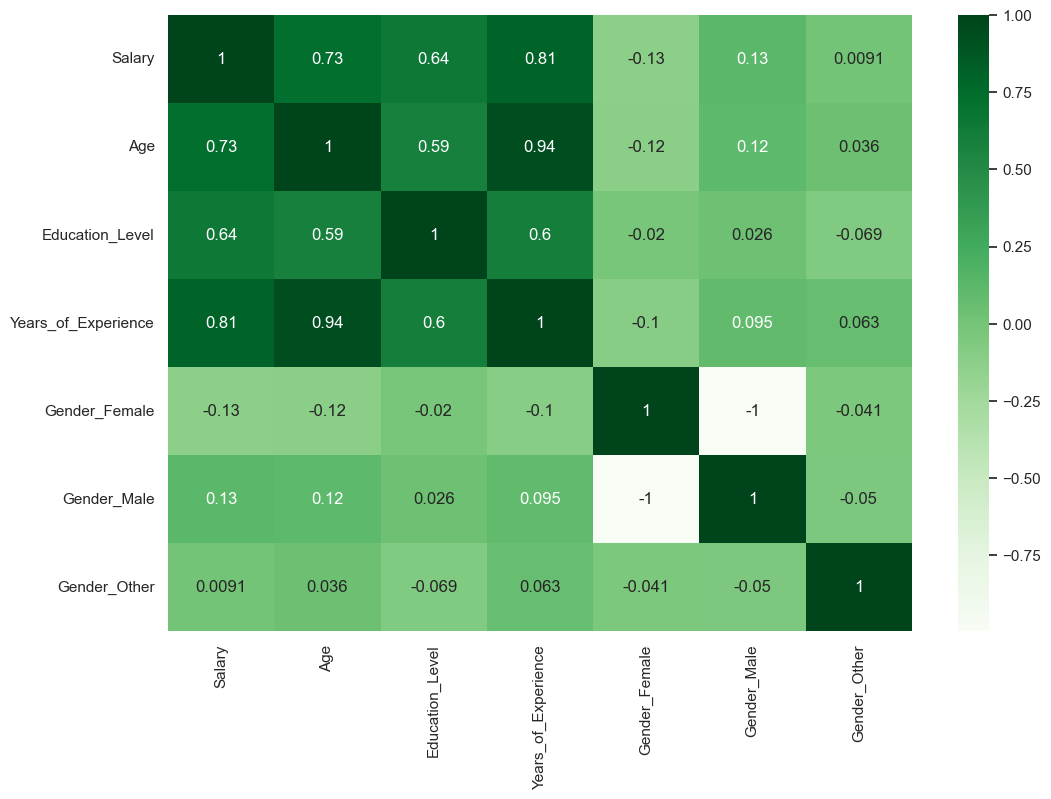

In [49]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="Greens",annot=True)

And a pairplot to see the relation between attributes. We can see how linear is Age vs Years of Experience. So, we will remove Age for our models

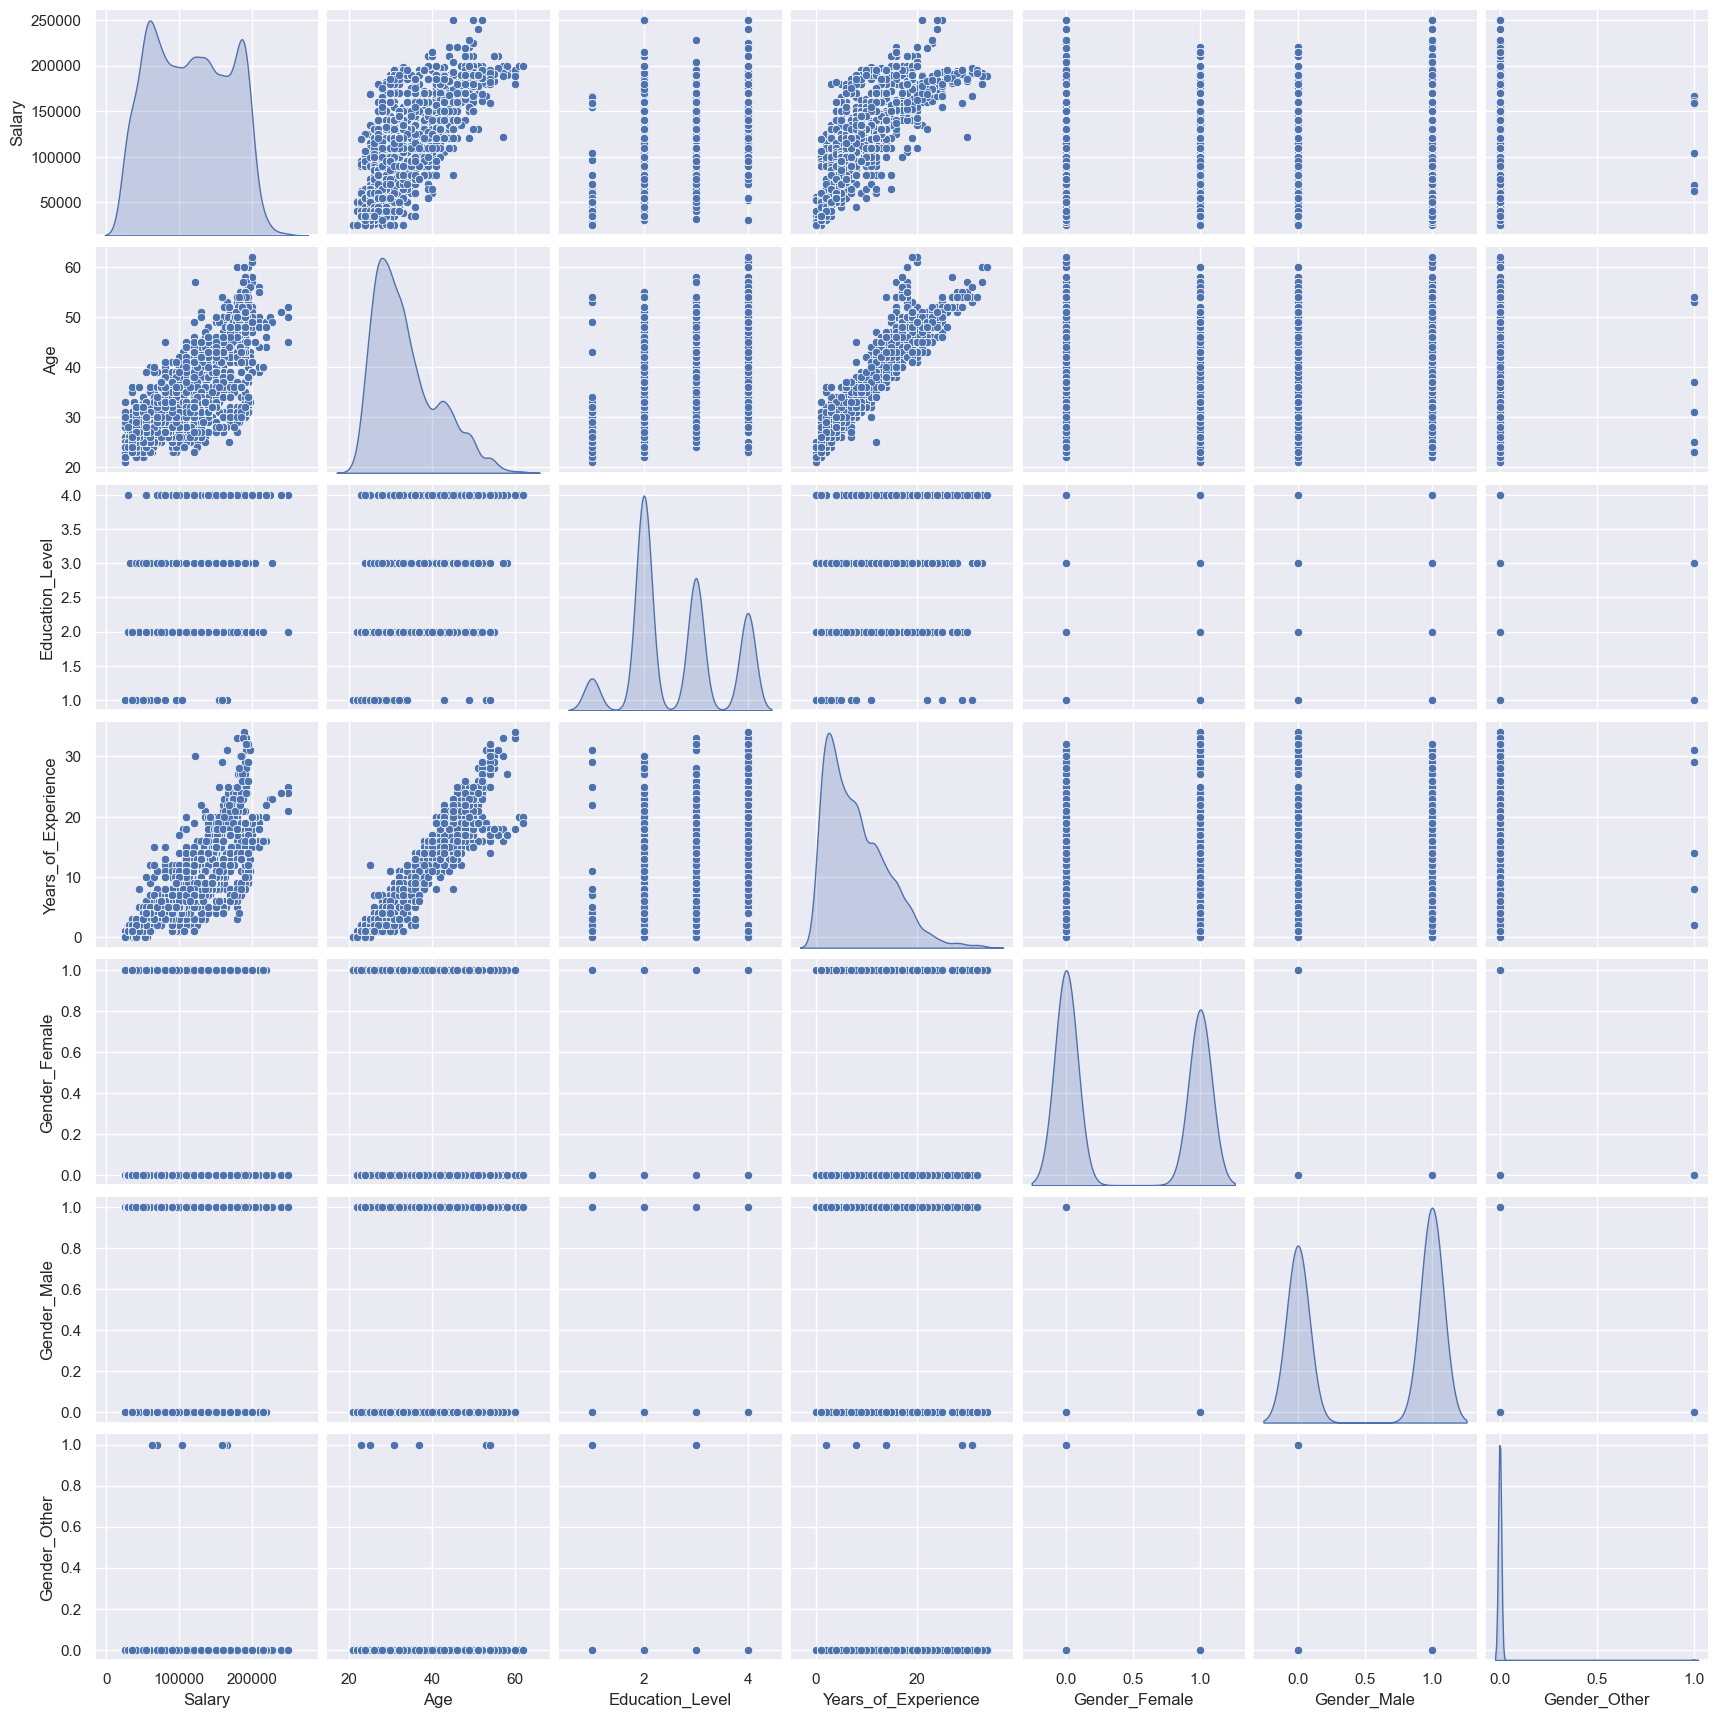

In [50]:
sns.pairplot(df, vars = df.columns, diag_kind='kde')

### First Model

I added a $R^2$ dictionary to keep track of the $R^2$ values and their respective models

In [51]:
R2modelsdict={}

I run a multi-linear model to check the pvalue of the attributes and remove them if pvalue > 0.05

In [52]:
y= df.Salary
X = df.drop('Salary',axis=1)

In [53]:
x_model=sm.add_constant(X)
model = sm.OLS(y,x_model).fit()

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     3256.
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:12:33   Log-Likelihood:                -78247.
No. Observations:                6702   AIC:                         1.565e+05
Df Residuals:                    6696   BIC:                         1.565e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.604e+04   3005.724     18.643      0.000    5.01e+04    6.19e+04
Age                 -2232.5866    132.469    -16.854      0.000   -2492.268   -1972.905
Education_Level      1.539e+04    501.057     30.720      0.000    1.44e+04    1.64e+04
Years_of_Experience  8275.1082    168.802     49.023      0.000    7944.203    8606.014
Gender_Female         2.33e+04   2187.189     10.654      0.000     1.9e+04    2.76e+04
Gender_Male          3.029e+04   2195.536     13.797      0.000     2.6e+04    3.46e+04
Gender_Other         2442.4104   5773.866      0.423      0.672   -8876.206    1.38e+04
==============================================================================
Omnibus:                      400.959   Durbin-Watson:                   0.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              499.813
Skew:                           0.585   Prob(JB):                    2.93e-109
Kurtosis:                       3.648   Cond. No.                     7.74e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.43e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [55]:
R2modelsdict['model1 - MultiLiner_first model']=model.rsquared

First Model is giving a $R^2$ of 0.709 which is ok for a data that is not treated completely yet. We will model and treat the data more to see if we can get a better model

We see that Gender_Other is not significant for Salary, so, I will remove that attribute as well

Then, I run a leverage vs resisual plot to inspect outliers.

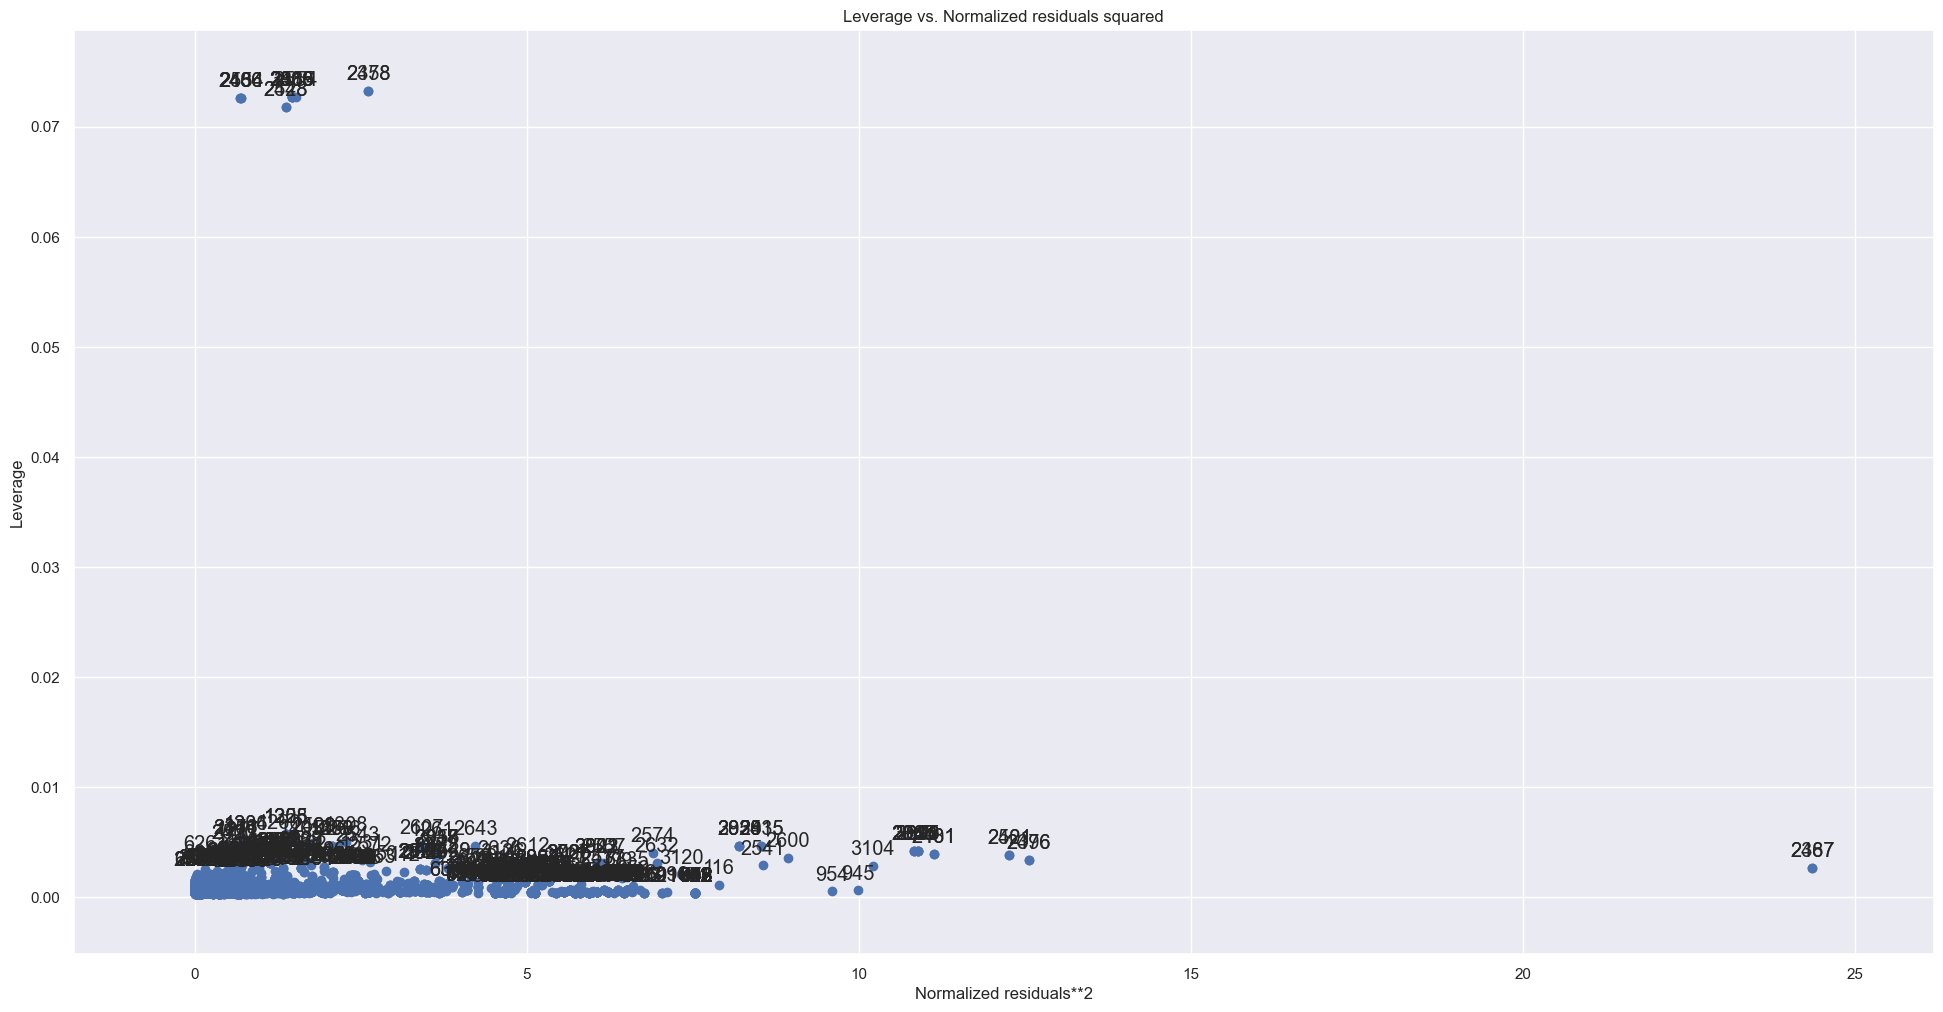

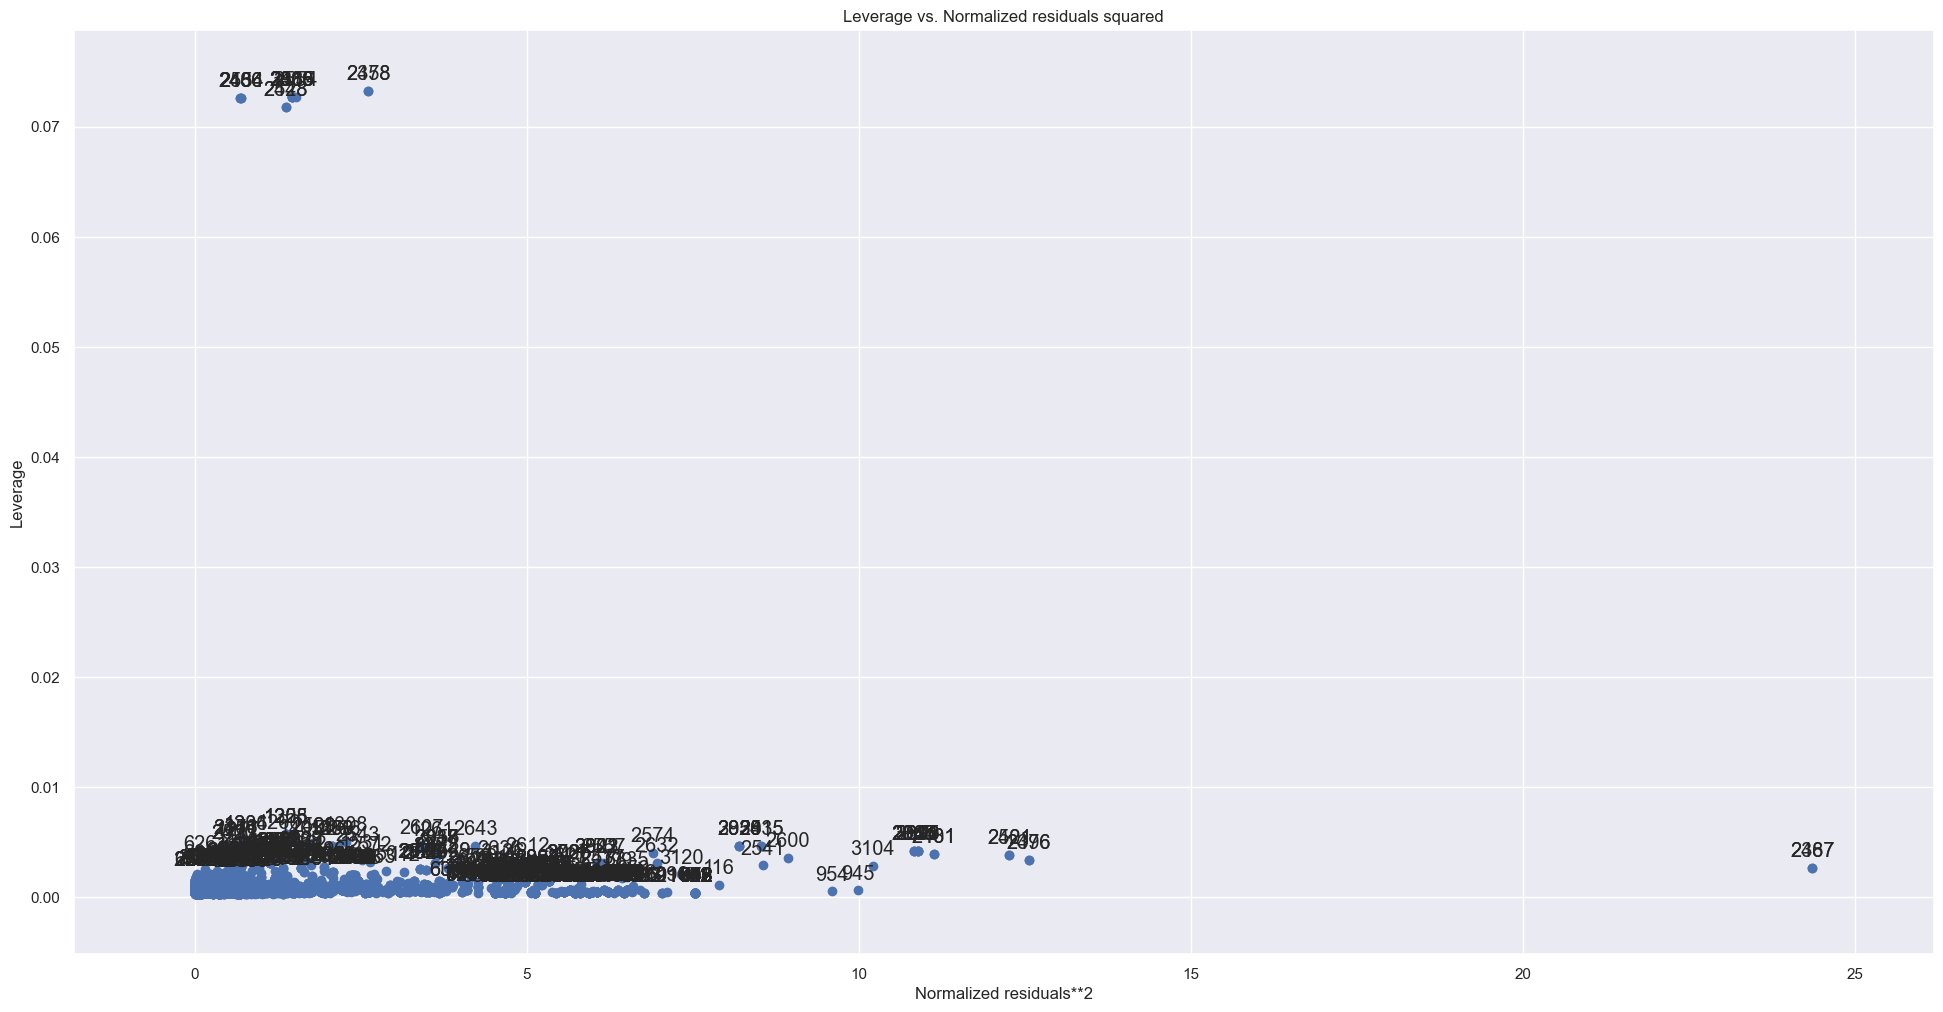

In [56]:
LevNor, ax = plt.subplots(figsize=(24,12))
LevNor = sm.graphics.plot_leverage_resid2(model,ax=ax)
LevNor

As per the plot above, we see we can remove rows: 2387, 2467 (highest residuals), 2458 and 2378 (highest leverage). I've filtered below to check the outliers

In [57]:
df.filter(items=[2387,2467,2458,2378],axis=0)

,Salary,Age,Education_Level,Years_of_Experience,Gender_Female,Gender_Male,Gender_Other
2387,121450.0,57.0,4,30.0,1,0,0
2467,121450.0,57.0,4,30.0,1,0,0
2458,166109.0,53.0,1,31.0,0,0,1
2378,166109.0,53.0,1,31.0,0,0,1


Then, I run a Influence plot just to double check if those points have the highest influence in the data as well

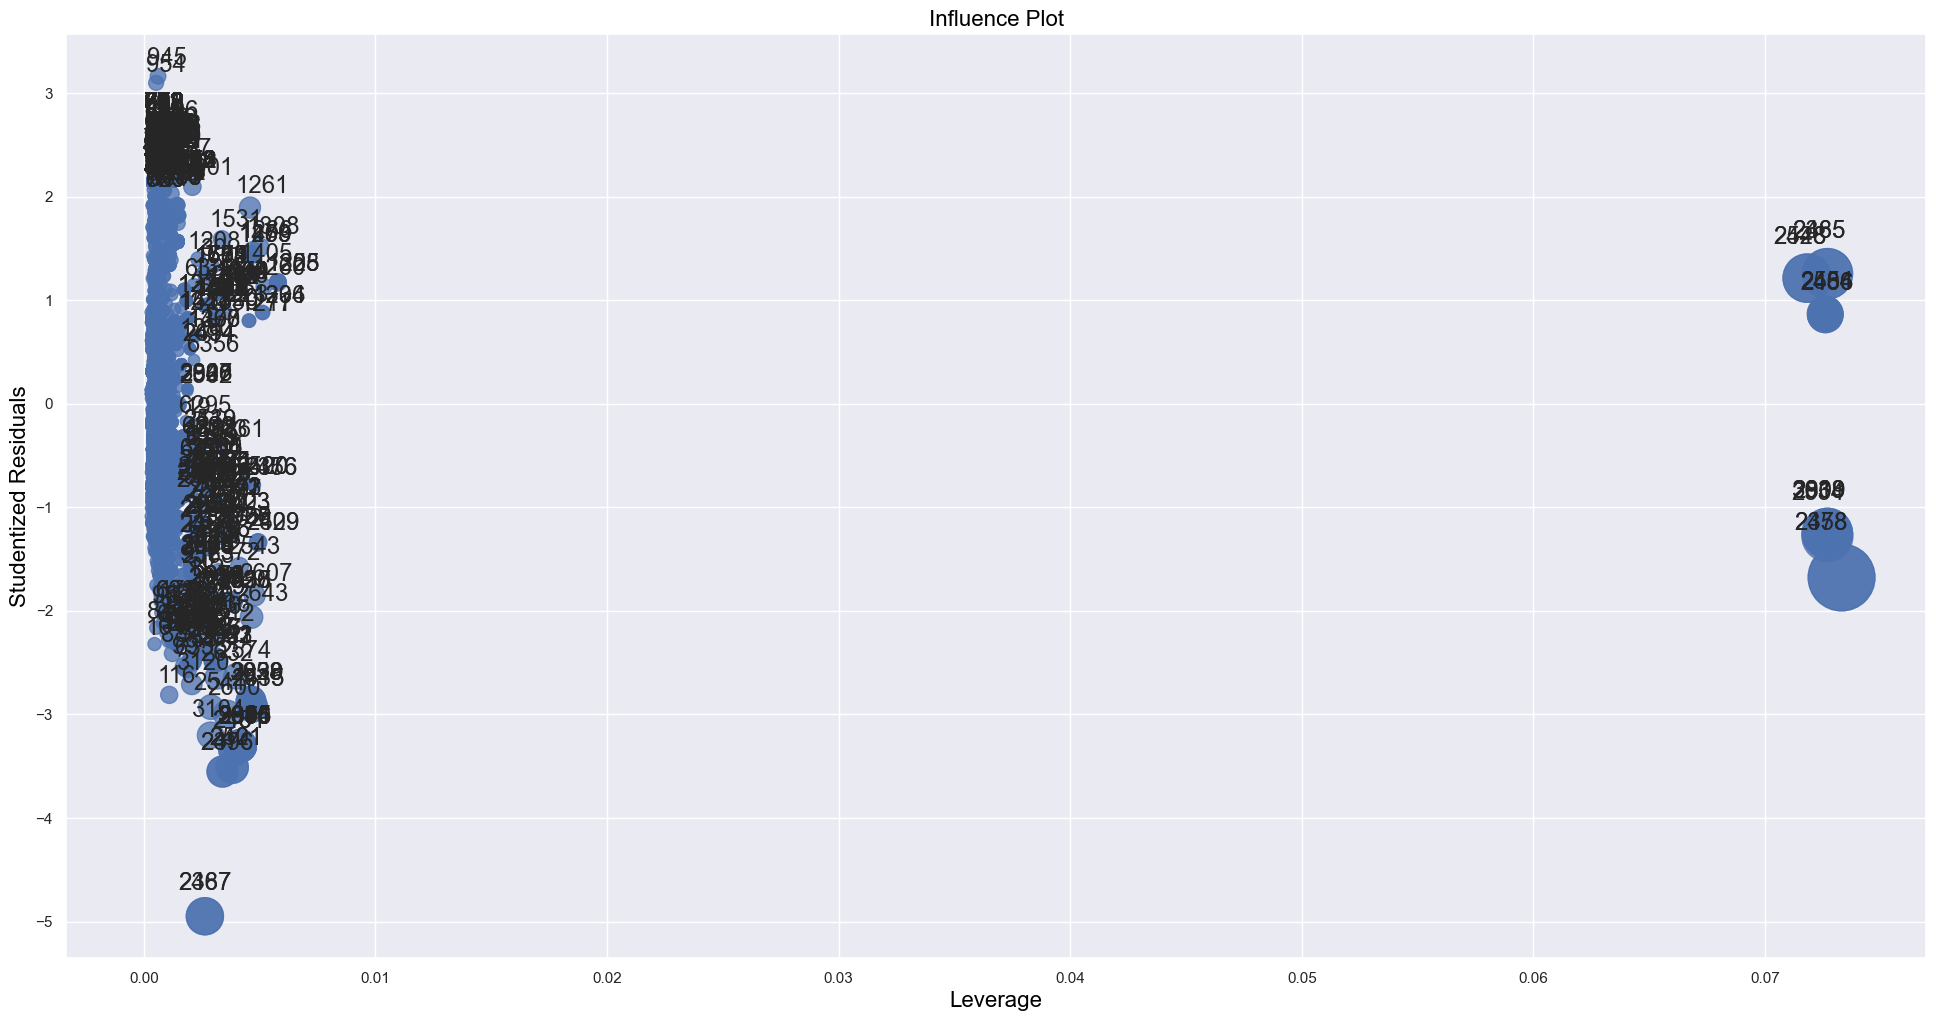

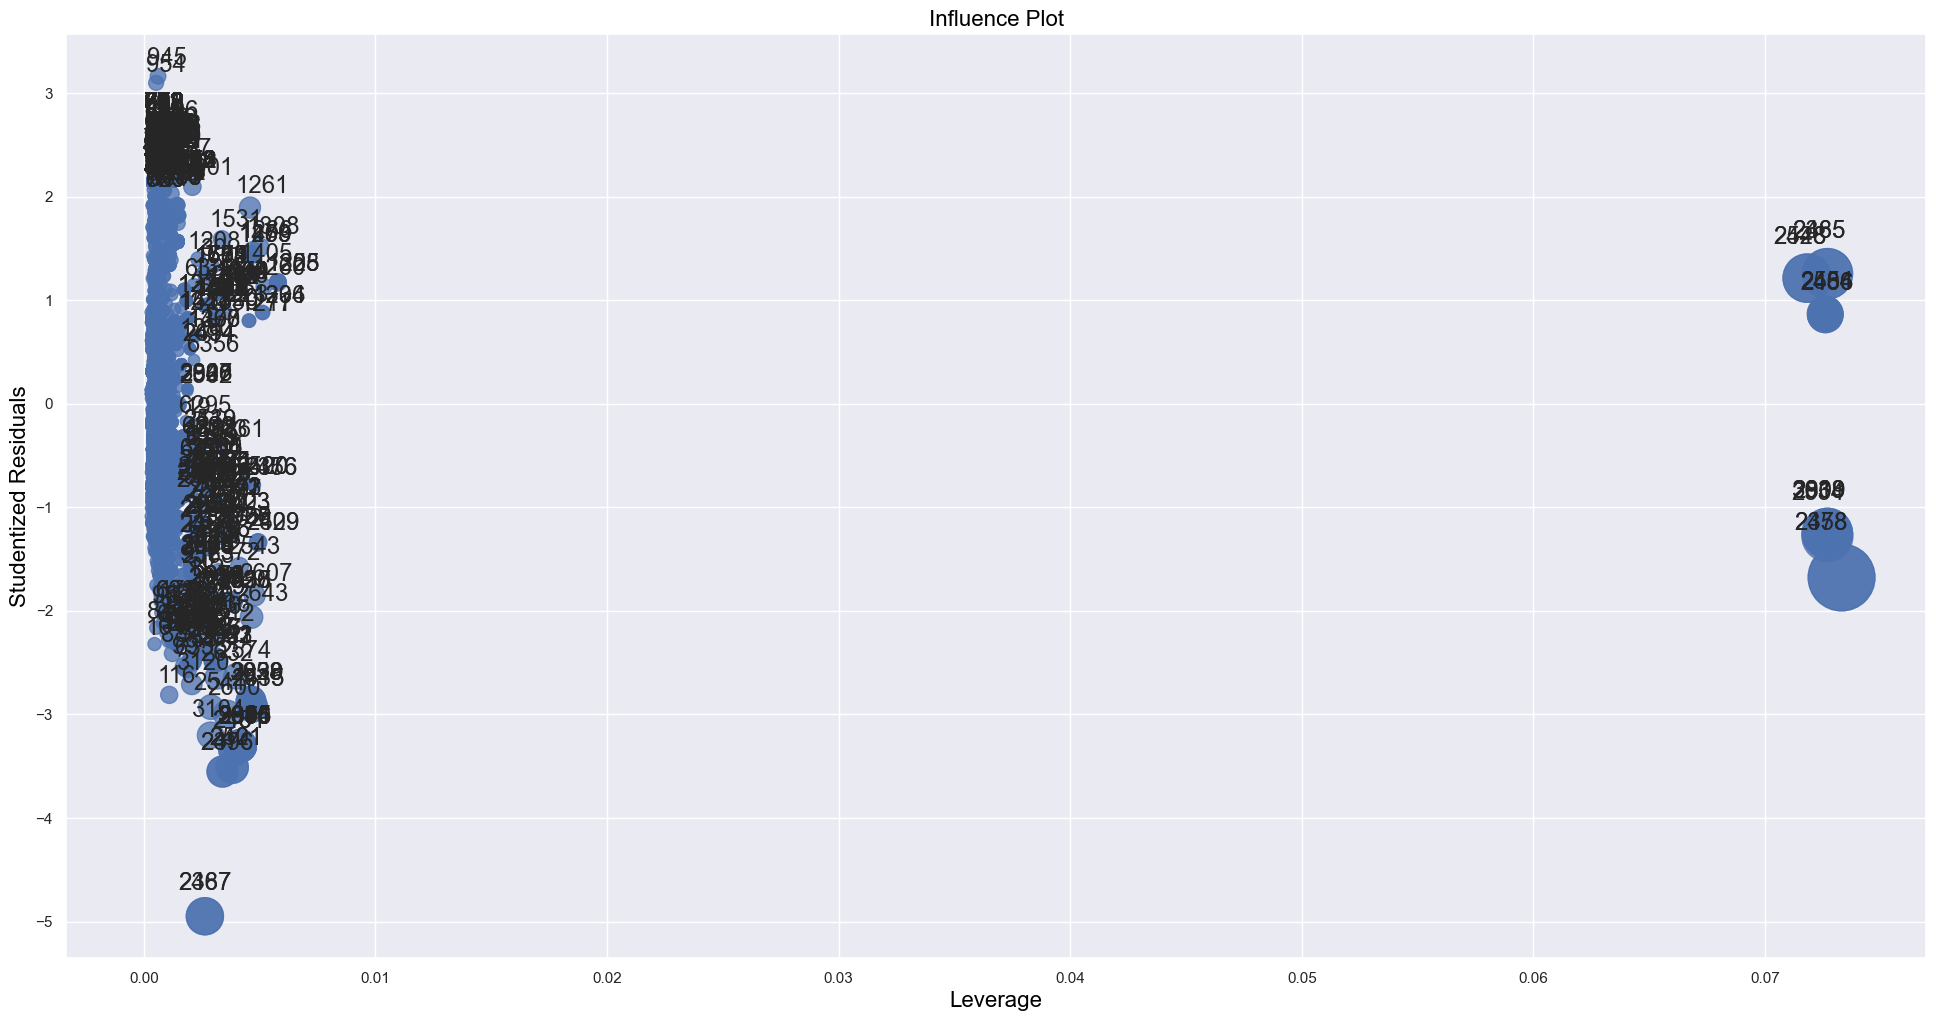

In [58]:
Influ, ax = plt.subplots(figsize=(24,12))
Influ = sm.graphics.influence_plot(model,ax=ax)
Influ

As the plot above, we see the 4 points have the highest influence in the data

So, After checking 1st model, residuals, levelage, influence, p-value>0.05, correlation and collinearity, it's time for us to fine tune the data to start creating different models

Starting with removing the collinearuty of the data: Age and the least significant attribute: Gender_Other

In [59]:
df = df.drop(["Age","Gender_Other"],axis=1)

And remove the outliers 2387,2467,2458,2378

In [60]:
df = df.drop([2387,2467,2458,2378], axis=0)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6698 entries, 0 to 6703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Salary               6698 non-null   float64
 1   Education_Level      6698 non-null   int64  
 2   Years_of_Experience  6698 non-null   float64
 3   Gender_Female        6698 non-null   uint8  
 4   Gender_Male          6698 non-null   uint8  
dtypes: float64(2), int64(1), uint8(2)
memory usage: 222.4 KB


## Models

I will model the data with a Linear Regression, Polynomial Regression, Forward Stepwise MultiLinear Regression and SVM/SVR Linear regression

### Data Train and Test Split

I split the data with 20% for test and 80% for train randomly

In [62]:
X_train, X_test, Y_train,Y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### Linear Model

Based on the correlation, Years of Esperience is the best to run a simple linear correlation with Salary

In [63]:
x_model2 = sm.add_constant(X_train['Years_of_Experience'])

In [64]:
model2 = sm.OLS(Y_train, x_model2).fit()

In [65]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                 1.029e+04
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:13:11   Log-Likelihood:                -63042.
No. Observations:                5361   AIC:                         1.261e+05
Df Residuals:                    5359   BIC:                         1.261e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.801e+04    706.107     82.156      0.000    5.66e+04    5.94e+04
Years_of_Experience  7088.6019     69.873    101.450      0.000    6951.623    7225.581
==============================================================================
Omnibus:                      190.190   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.114
Skew:                           0.456   Prob(JB):                     5.28e-47
Kurtosis:                       3.350   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As expected, a simple linear regression only gives a $R^2$ of 0.658 which is considered not too good

Adding the model1 to our dictionary

In [66]:
R2modelsdict['model2 - Linear']=model2.rsquared

In [67]:
x_pred_model2 = sm.add_constant(X_test['Years_of_Experience'])

In [69]:
pred_model2 = model2.predict(x_pred_model2)

In [70]:
print('Accuracy',100- (np.mean(np.abs((Y_test - pred_model2) / Y_test)) * 100))

Accuracy 72.32875739950136


### Polynomial Regression

I will run a Poly regression using Years of Experience to predict the Salary

In [71]:
polynomial_features= PolynomialFeatures(degree=3)

In [74]:
xp = polynomial_features.fit_transform(x_model2)

In [75]:
model3 = sm.OLS(Y_train, xp).fit()

In [76]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     4999.
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:13:50   Log-Likelihood:                -62337.
No. Observations:                5361   AIC:                         1.247e+05
Df Residuals:                    5357   BIC:                         1.247e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7644.4426    275.978     27.699      0.000    7103.413    8185.472
x1          7644.4426    275.978     27.699      0.000    7103.413    8185.472
x2          5315.3927    128.819     41.262      0.000    5062.855    5567.931
x3          7644.4426    275.978     27.699      0.000    7103.413    8185.472
x4          5315.3927    128.819     41.262      0.000    5062.855    5567.931
x5          -260.3046     17.242    -15.097      0.000    -294.106    -226.503
x6          7644.4426    275.978     27.699      0.000    7103.413    8185.472
x7          5315.3927    128.819     41.262      0.000    5062.855    5567.931
x8          -260.3046     17.242    -15.097      0.000    -294.106    -226.503
x9             5.4670      0.839      6.515      0.000       3.822       7.112
==============================================================================
Omnibus:                      334.549   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              398.537
Skew:                           0.650   Prob(JB):                     2.88e-87
Kurtosis:                       3.308   Cond. No.                     2.43e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.35e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [94]:
R2modelsdict['model3 - Poly']=model3.rsquared

In [95]:
xp_pred = polynomial_features.fit_transform(x_pred_model2)

In [96]:
pred_model3 = model3.predict(xp_pred)

In [97]:
print('Accuracy',100- (np.mean(np.abs((Y_test - pred_model3) / Y_test)) * 100))

Accuracy 78.10888119363167


So, I've tried different degrees in the polynomial and the one which gives the best complexity vs benefit is degree 5 which the $R^2$ = 0.735, and accuracy of  much better the simple linear and it is considered a good model. Let's see what the other ones can bring to us still

### Multi-Linear Regression

#### Forward Stepwise K=1

In [82]:
best = ['',0]
allowed_factors = ['Education_Level' , 'Years_of_Experience' , 'Gender_Female' , 'Gender_Male']
for p in allowed_factors:
    x_model_multi = sm.add_constant(X_train[p])
    model4  = sm.OLS(Y_train, x_model_multi).fit()
    print(p, model4.rsquared)
    if model4.rsquared>best[1]:
        best = [p, model4.rsquared]
print('best:',best)

Education_Level 0.4181203391460009
Years_of_Experience 0.6575961329161313
Gender_Female 0.015976389224355403
Gender_Male 0.01583989935115493
best: ['Years_of_Experience', 0.6575961329161313]


In [83]:
x_model_multi = sm.add_constant(X_train['Years_of_Experience'])
train_bmi1 = sm.OLS(Y_train, x_model_multi).fit()
train_bmi1.summary()
print(train_bmi1.rsquared)
x_model_multi_pred = sm.add_constant(X_test['Years_of_Experience'])
pred_model4 = train_bmi1.predict(x_model_multi_pred)
print('Accuracy',100- (np.mean(np.abs((Y_test - pred_model4) / Y_test)) * 100))

0.6575961329161313
Accuracy 72.32875739950136


In [84]:
R2modelsdict['model4 - forward k=1']=train_bmi1.rsquared

#### Forward Stepwise K=2

In [85]:
best=['',0]
for p in allowed_factors:
    x_model_multi = sm.add_constant(X_train[['Years_of_Experience', p]])
    model5  = sm.OLS(Y_train, x_model_multi).fit()
    print(p, model5.rsquared)
    if model5.rsquared>best[1]:
        best = [p, model5.rsquared]
print('best:',best)
x_model_multi = sm.add_constant(X_train[['Years_of_Experience', 'Education_Level']])
train_bmi2=sm.OLS(Y_train, x_model_multi).fit()
print(train_bmi2.rsquared)
x_model_multi_pred = sm.add_constant(X_test[['Years_of_Experience', 'Education_Level']])
pred_model5 = train_bmi2.predict(x_model_multi_pred)
print('Accuracy',100- (np.mean(np.abs((Y_test - pred_model5) / Y_test)) * 100))

Education_Level 0.6942412642823903
Years_of_Experience 0.6573183250867085
Gender_Female 0.6599369565064739
Gender_Male 0.6602614048988138
best: ['Education_Level', 0.6942412642823903]
0.6942412642823903
Accuracy 75.47678495072675


In [86]:
R2modelsdict['model5 - forward k=2']=train_bmi2.rsquared

#### Forward Stepwise K=3

In [87]:
best=['',0]
allowed_factors = ['Gender_Female','Gender_Male']
for p in allowed_factors:
    x_model_multi = sm.add_constant(X_train[['Years_of_Experience', 'Education_Level', p]])
    model6  = sm.OLS(Y_train, x_model_multi).fit()
    print(p, model6.rsquared)
    if model6.rsquared>best[1]:
        best = [p, model6.rsquared]
print('best:',best)
x_model_multi = sm.add_constant(X_train[['Years_of_Experience', 'Education_Level','Gender_Male']])
train_bmi3=sm.OLS(Y_train, x_model_multi).fit()
print(train_bmi3.rsquared)
x_model_multi_pred = sm.add_constant(X_test[['Years_of_Experience', 'Education_Level','Gender_Male']])
pred_model6 = train_bmi3.predict(x_model_multi_pred)
print('Accuracy',100- (np.mean(np.abs((Y_test - pred_model6) / Y_test)) * 100))

Gender_Female 0.6974503662569462
Gender_Male 0.6975917491366986
best: ['Gender_Male', 0.6975917491366986]
0.6975917491366986
Accuracy 75.70915278723024


In [88]:
R2modelsdict['model6 - forward k=3']=train_bmi3.rsquared

#### Forward Stepwise K=4

In [89]:
best=['',0]
allowed_factors = ['Gender_Female']
for p in allowed_factors:
    x_model_multi = sm.add_constant(X_train[['Years_of_Experience', 'Education_Level','Gender_Male',p]])
    model7  = sm.OLS(Y_train, x_model_multi).fit()
    print(p, model7.rsquared)
    if model7.rsquared>best[1]:
        best = [p, model7.rsquared]
print('best:',best)
x_model_multi = sm.add_constant(X_train[['Years_of_Experience', 'Education_Level','Gender_Male', 'Gender_Female']])
train_bmi4=sm.OLS(Y_train, x_model_multi).fit()
print(train_bmi4.rsquared)
x_model_multi_pred = sm.add_constant(X_test[['Years_of_Experience', 'Education_Level','Gender_Male', 'Gender_Female']])
pred_model7 = train_bmi4.predict(x_model_multi_pred)
print('Accuracy',100- (np.mean(np.abs((Y_test - pred_model7) / Y_test)) * 100))

Gender_Female 0.6977538505889128
best: ['Gender_Female', 0.6977538505889128]
0.6977538505889128
Accuracy 75.66595930320446


In [90]:
R2modelsdict['model7 - forward k=4']=train_bmi4.rsquared

### Support Vector Machine - SVR Linear

model8 = SVR(C=2, kernel='linear')

SVM=model8.fit(X_train,Y_train)
pred_model8=SVM.predict(X_test)
r2= metrics.r2_score(Y_train, SVM.predict(X_train))
print('R2 Value:',metrics.r2_score(Y_train, SVM.predict(X_train)))
print('Accuracy',100- (np.mean(np.abs((Y_test - pred_model8) / Y_test)) * 100))

In [92]:
R2modelsdict['model8 - svm/svr linear']=r2

## Results and Analysis

In [98]:
R2modelsdict

{'model1 - MultiLiner_first model': 0.7085729978152125,
 'model2 - Linear': 0.6575961329161313,
 'model3 - Poly': 0.7367943356325364,
 'model4 - forward k=1': 0.6575961329161313,
 'model5 - forward k=2': 0.6942412642823903,
 'model6 - forward k=3': 0.6975917491366986,
 'model7 - forward k=4': 0.6977538505889128,
 'model8 - svm/svr linear': 0.640189475990416}

As we can see from the R2 models dictionary, the model that has the highest $R^2$ is the Polynomial power 5 Regression considering Salary vs Years of Experience, so the Accuracy of this model is the highest (78.1) considering the models run in this analysis. Also, it was the only model with a $R^2$ > 0.7 after the data was treated and the collinearity fixed (the first model was a multi-linear model which collinearity between Age and Years of Experience would interfere in all regression models).

Model 2 - Linear, and Model 4 forward k=1 are similar as expected because after running the correlation matrix, it was clear the Years of Experience was more correlated to the salary considering the numeric attributes, so running a step 1 forward would be the same as running a linear regression with the most correlated attribute.

Model 5 forward k=2 gets a 0.04 improvement of the model , seems promissing, but when we include the gender type (model 6(male) and model 7(female)) it has almost no improvement, so that forward stepwise multi liner regressing would be ok only with years of experience and education level, so, gender has no impacting the salary which is a surprise considering the world we live, but male got chosen first by the model, showing that male is still the gender that has more impact in the Salary

I used a different model of the class and I was wondering using a linear regression model with SVM would perform and end up being worse than the linear model, causes for that is only few attributes and SVM performs better with medium/large size of attibutes > 10, I only had 4 and 2 (Genders) are basicaly considered the same. Althogh, the prediction was 75.3, almost the same the other models, showing one of the characteristics of this model, they are less volatile to the test data, as the simple linear regression is too volatile to any adding data.

Overall, this data tells us the Years of Experience is the best predictor for the salary, Education Level plays a role, but showing the Polynomial model using only years of experience, could beat any of the other models using Education level or not

## Conclusion

I believe the biggest bias of this data is the fact that most of the data is Salary of the people in Technology in general, and the analysis shows that
1. Years of experience is the most correlated to the data
2. Education Level is not that important because "anyone" can learn and have build experience in the field
3. the models didn't achive a high $R^2$ and accuracy because only of the thing that most correlate to salary is job position, as I had a big variaty of position I had to remove from the data, so, for the next analysis of this data would include the job position using a classifier or other model that would consider object attributes
4. I've only considered few regressions models only, I would use more complex models to fit the data